In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv('MSFT.csv')

In [5]:
data = data.dropna(axis=0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9698 entries, 14 to 9711
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9698 non-null   object 
 1   Open       9698 non-null   float64
 2   High       9698 non-null   float64
 3   Low        9698 non-null   float64
 4   Close      9698 non-null   float64
 5   Adj Close  9698 non-null   float64
 6   Volume     9698 non-null   int64  
 7   %K         9698 non-null   float64
 8   %R         9698 non-null   float64
 9   RSI        9698 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 833.4+ KB


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
# Since RSI, %K, and %R are not fully populated, fill missing with forward-fill
data.fillna(method='ffill', inplace=True)

/var/folders/bk/46wnp9s10t9g39x_n6dfykjh0000gn/T/ipykernel_1938/1803368913.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


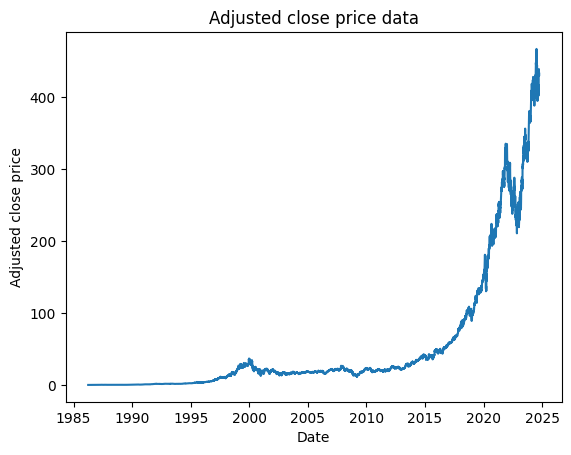

In [9]:
plt.plot(data['Date'], data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adjusted close price')
plt.title('Adjusted close price data')
plt.show()

In [10]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])
fig.update_layout(title='MSFT Candlestick Chart', xaxis_title='Date', yaxis_title='Price')

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

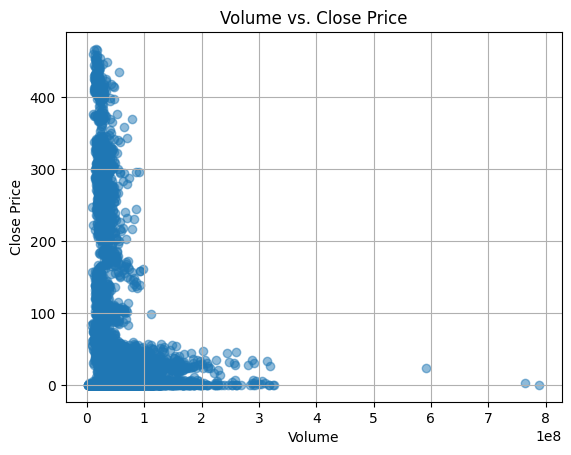

In [11]:
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

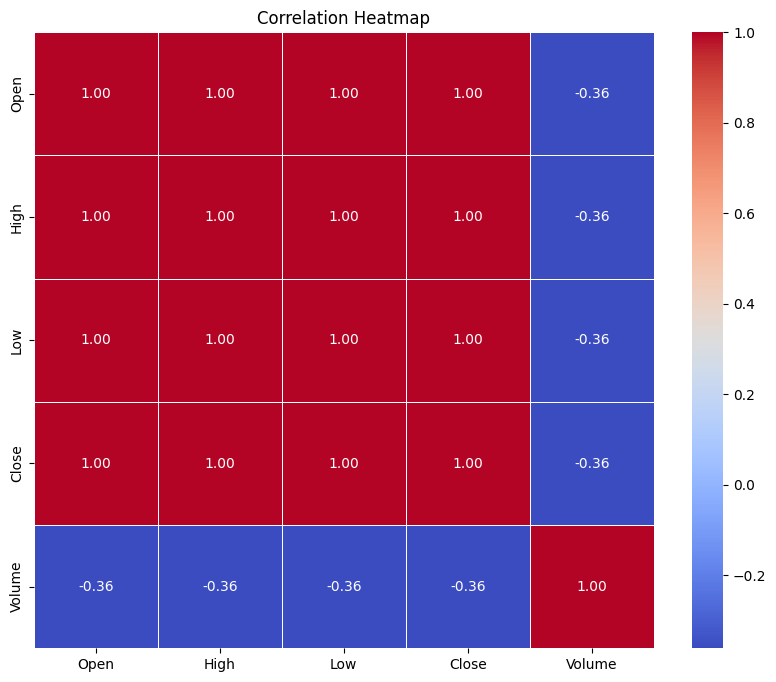

In [12]:
correlation_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
data.dropna(inplace=True)

In [17]:
#Normalize the features for LSTM
data_for_scaling = data.drop(columns=['Date']) #MinMaxScaler does not know how to handle non-numeric data types like dates.
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_for_scaling), columns=data_for_scaling.columns, index=data.index)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9599 entries, 113 to 9711
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        9599 non-null   datetime64[ns]
 1   Open        9599 non-null   float64       
 2   High        9599 non-null   float64       
 3   Low         9599 non-null   float64       
 4   Close       9599 non-null   float64       
 5   Adj Close   9599 non-null   float64       
 6   Volume      9599 non-null   int64         
 7   %K          9599 non-null   float64       
 8   %R          9599 non-null   float64       
 9   RSI         9599 non-null   float64       
 10  MA20        9599 non-null   float64       
 11  MA50        9599 non-null   float64       
 12  MA100       9599 non-null   float64       
 13  Returns     9599 non-null   float64       
 14  Close_Lag1  9599 non-null   float64       
 15  Close_Lag2  9599 non-null   float64       
dtypes: datetime64[ns](1), float

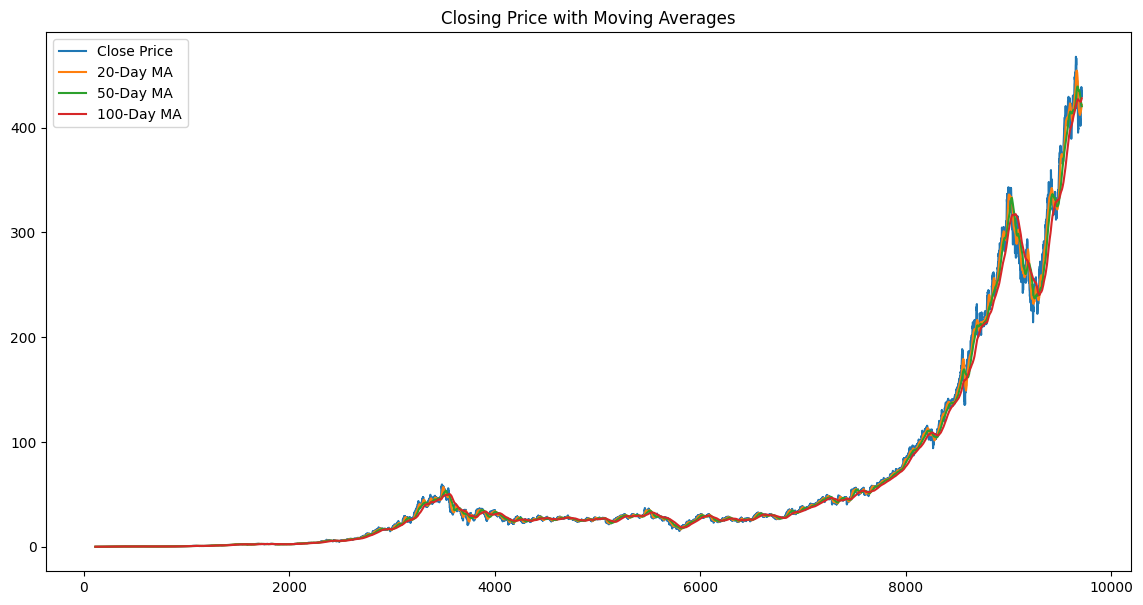

In [19]:
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, data['MA20'], label='20-Day MA')
plt.plot(data.index, data['MA50'], label='50-Day MA')
plt.plot(data.index, data['MA100'], label='100-Day MA')
plt.title('Closing Price with Moving Averages')
plt.legend(loc='best')
plt.show()

In [32]:
data.iloc[30:36][::-1]

,Date,Open,High,Low,Close,Adj Close,Volume,%K,%R,RSI,...,MACD_Signal,BB_Middle,BB_Std_Dev,BB_Upper,BB_Lower,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span
148,1986-10-13,0.119792,0.119792,0.114583,0.114583,0.070651,27129600,75.860774,-29.033814,64.823870,...,0.001259,0.104123,0.006436,0.116995,0.091251,0.108941,0.108941,NaN,NaN,0.140625
147,1986-10-10,0.114583,0.122396,0.112847,0.119792,0.073863,76752000,88.948782,-9.676701,76.284437,...,0.000773,0.103385,0.006005,0.115396,0.091375,0.108941,0.108941,NaN,NaN,0.148438
146,1986-10-09,0.111111,0.117188,0.111111,0.114583,0.070651,92563200,88.046794,-12.003496,71.626426,...,0.000261,0.102300,0.004705,0.111709,0.092891,0.106337,0.106337,NaN,NaN,0.147569
145,1986-10-08,0.108073,0.112413,0.106771,0.111111,0.068510,119606400,87.634338,-7.691834,67.699866,...,-0.000114,0.101606,0.003718,0.109041,0.094171,0.103949,0.101779,NaN,NaN,0.146267
144,1986-10-07,0.105903,0.110243,0.105903,0.108073,0.066637,59788800,73.670199,-14.704862,63.607942,...,-0.000372,0.101302,0.003096,0.107495,0.095109,0.102865,0.100694,NaN,NaN,0.148438
143,1986-10-06,0.100694,0.107639,0.100694,0.105903,0.065299,85334400,54.760731,-14.284541,60.269566,...,-0.000510,0.101237,0.002957,0.107151,0.095323,0.101562,0.100260,NaN,NaN,0.148438
